# Random Cut Forest (2)

Data source: [kaggle_DailyDelhiClimate](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

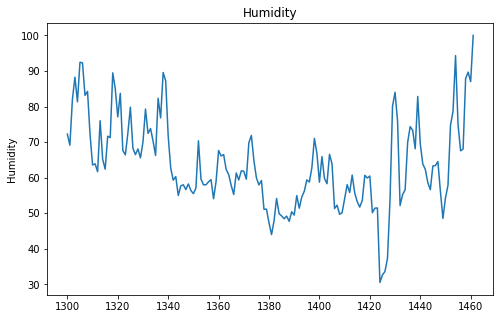

In [2]:
# Laad original data
data = pd.read_csv(
    "D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/RCF/DailyClimate.csv").loc[1300:,:]
plt.figure(figsize=(8, 5))
plt.plot(data["humidity"])
plt.title("Humidity")
plt.ylabel("Humidity")
plt.show()

In [3]:
# Load predicted data
data_pred = pd.read_csv("D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/RCF/data_pred.csv")[["humidity", "score"]]
print(data.shape)
data_pred.head()

(162, 5)


,humidity,score
0,72.250000,1.122689
1,69.125000,1.099222
2,82.000000,1.244185
3,88.250000,1.299655
4,81.333333,1.223736


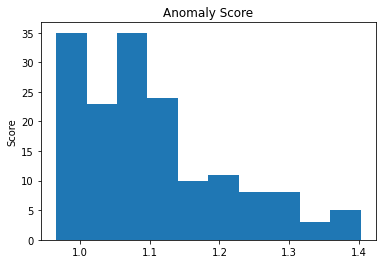

In [4]:
# Histogram
plt.hist(data_pred["score"])
plt.title("Anomaly Score")
plt.ylabel("Score")
plt.show()

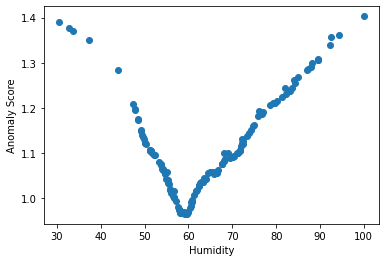

In [5]:
# Scatter plot
plt.scatter(data_pred["humidity"], data_pred["score"])
plt.xlabel("Humidity")
plt.ylabel("Anomaly Score")
plt.show()

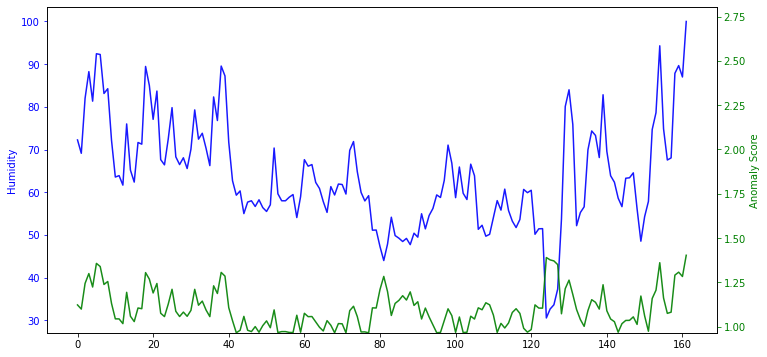

In [6]:
# Line plot of humidy and its anomaly score
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(data_pred["humidity"], color="blue", alpha=0.9)
ax2.plot(data_pred["score"], color="green", alpha=0.9)

ax1.set_ylabel("Humidity", color="blue")
ax2.set_ylabel("Anomaly Score", color="green")
ax1.tick_params("y", colors="blue")
ax2.tick_params("y", colors="green")

ax2.set_ylim(min(data_pred["score"]), 2*max(data_pred["score"]))
fig.set_figwidth(12)
fig.set_figheight(6)

Higher anomaly score indicates that the data point is an anomaly. To decide the threshold of anomaly score, standard deviation can be applied.

In [7]:
# Standard deviation of anomaly score
mean = data_pred["score"].mean()
sd = data_pred["score"].std()
sd2 = 2 * sd
sd3 = 3 * sd

print("Average: {}".format(mean))
print("Standard deviation: {}".format(sd))
print("Anomaly (mean + 2 SD): {}".format(mean + 2*sd))
print("Anomaly (mean + 3 SD): {}".format(mean + 3*sd))

Average: 1.1000711575932098
Standard deviation: 0.10907932832871926
Anomaly (mean + 2 SD): 1.3182298142506483
Anomaly (mean + 3 SD): 1.4273091425793676


In [8]:
anomaly1 = data_pred[data_pred["score"] > (mean + 2*sd)]
anomaly1

,humidity,score
5,92.437500,1.357027
6,92.266667,1.339372
124,30.550000,1.389999
125,32.647059,1.376794
126,33.636364,1.370992
127,37.318182,1.350226
154,94.300000,1.360949
161,100.000000,1.402895


In [9]:
anomaly2 = data_pred[data_pred["score"] > (mean + 3*sd)]
print(anomaly2)

Empty DataFrame
Columns: [humidity, score]
Index: []


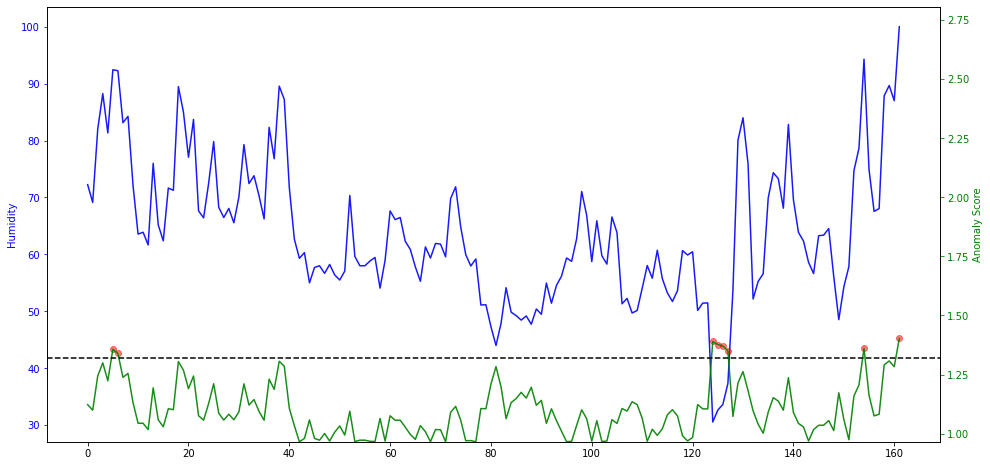

In [10]:
# Line plot of humidy and identifying its anomaly score
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(data_pred["humidity"], color="blue", alpha=0.9)
ax2.plot(data_pred["score"], color="green", alpha=0.9)

ax1.set_ylabel("Humidity", color="blue")
ax2.set_ylabel("Anomaly Score", color="green")
ax1.tick_params("y", colors="blue")
ax2.tick_params("y", colors="green")

ax2.axhline(y=(mean + 2*sd), color="black", linestyle="dashed")
ax2.set_ylim(min(data_pred["score"]), 2*max(data_pred["score"]))
ax2.scatter(anomaly1.index, anomaly1["score"], alpha=0.5, color="red")

fig.set_figwidth(16)
fig.set_figheight(8)